In [34]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
# data from NPTEL 2025 course, Biological data analysis and visualization with R
df = pd.read_table('/Users/subasrees/Desktop/Nptel_2/week7/PCA_Yeast_expression_noise_data/PCAdata_formatted_collated.txt')
df_yeast=pd.DataFrame(df)

In [45]:
metadata = pd.read_table('/Users/subasrees/Desktop/Nptel_2/week7/PCA_Yeast_expression_noise_data/Metadata.txt')
metadata.groupby(['Group']).count()
metadata['idx'] = metadata.groupby('Group').cumcount().add(1)

,Unnamed: 0,Group,idx
0,AAH1,GrEH,1
1,AAT1,GrF,1
2,ABD1,GrF,2
3,ABF1,GrF,3
4,ABF2,GrEH,2
...,...,...,...
1945,ZRC1,GrF,849
1946,ZRT2,GrF,850
1947,ZTA1,GrB,99
1948,ZUO1,GrEM,604


In [ ]:
#scaler = StandardScaler()
#scaled_X = scaler.fit_transform(data)
#print(scaled_X)

In [ ]:
data=df_yeast.T
scaled_data = preprocessing.scale(data)
print(scaled_data)

[[-0.12969066  0.56995674 -0.11360497 ...  0.65149337 -0.16481907
   0.15645579]
 [-0.24443707  0.04609629 -0.87537061 ...  0.65149337 -0.16481907
   0.15645579]
 [-0.25129139 -0.65626124 -0.4636054  ...  0.65149337 -0.16481907
   0.15645579]
 ...
 [-0.24342161  0.39478274 -0.5665467  ...  0.65149337 -0.16481907
   0.15645579]
 [ 0.72075289 -0.59834464  2.00698587 ...  0.65149337 -0.16481907
   0.15645579]
 [-0.10938156  0.14982398  0.42168981 ... -0.24422339 -0.16481907
   0.15645579]]


In [ ]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
print(pca_data)

[[ 1.81783987e-01 -1.93208549e+00 -2.14590473e+00 ... -1.97336814e-01
  -1.71502494e-02  3.04829642e-02]
 [-3.57511321e+00 -1.44146855e+00  5.37010606e-01 ...  1.48566257e-01
   6.78806366e-04  5.80494513e-02]
 [ 6.87104532e-01 -1.83790716e+00 -2.11937881e+00 ...  4.69388789e-01
   3.76691961e-03 -1.14451142e-01]
 ...
 [-1.38331131e+00 -1.76238245e+00 -1.34932149e+00 ...  1.29834690e-01
   3.08336842e-03  1.25794683e-02]
 [ 2.12566980e+00 -1.59000005e+00  1.54190843e+00 ... -1.22102239e-01
  -1.23360553e-01  7.80032629e-02]
 [-1.12853174e+00  2.75265536e+00  1.59785564e+00 ...  9.54677703e-02
   5.42606460e-01 -1.04112558e-01]]


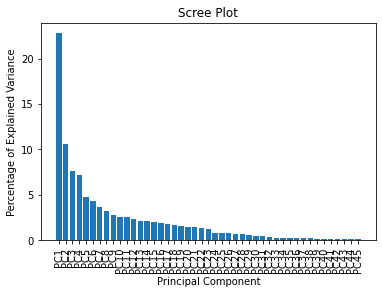

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=90)
plt.show()

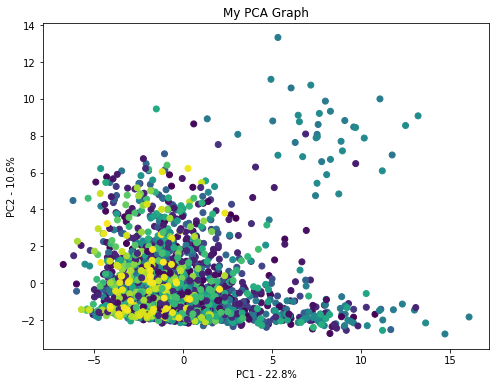

In [46]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=data.index, columns=labels)
plt.figure(figsize=(8,6))
plt.scatter(pca_df.PC1, pca_df.PC2,c=metadata['idx'])
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [ ]:
loading_scores = pd.Series(pca.components_[0], index=data.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10_features = sorted_loading_scores[0:10].index.values
 
## print the feature names and their scores (and +/- sign)
print(loading_scores[top_10_features])

tAI_f50              0.279319
tAI_f40              0.275917
tAI_f75              0.274280
tAI_full             0.269121
tAI_f30              0.268925
tAI_f100             0.263635
tAI_f25              0.260932
tAI_f20              0.246981
tRNA_availabiltiy    0.246797
tAI_f150             0.233999
dtype: float64
